**Sales Performance Analysis**

In [5]:
!pip install kagglehub pandas matplotlib seaborn

import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [6]:
# Download dataset from KaggleHub
path = kagglehub.dataset_download("bhanupratapbiswas/superstore-sales")
print("Dataset path:", path)


Dataset path: /kaggle/input/superstore-sales


In [7]:
# Find actual CSV file name
for root, dirs, files in os.walk(path):
    for file in files:
        print("✅ Found:", os.path.join(root, file))


✅ Found: /kaggle/input/superstore-sales/superstore_final_dataset (1).csv


In [8]:
import pandas as pd

# Load with encoding to avoid Unicode errors
df = pd.read_csv('/kaggle/input/superstore-sales/superstore_final_dataset (1).csv', encoding='ISO-8859-1')

# Preview the dataset
df.head()


,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [9]:
# Clean column names (strip spaces)
df.columns = df.columns.str.strip()

# Inspect the dataset
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,0
Row_ID,0
Order_ID,0
Order_Date,0
Ship_Date,0
Ship_Mode,0
Customer_ID,0
Customer_Name,0
Segment,0
Country,0
City,0


In [10]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], errors='coerce')


In [11]:
df['Profit'] = df['Sales'] * 0.30  # Assume 30% profit margin


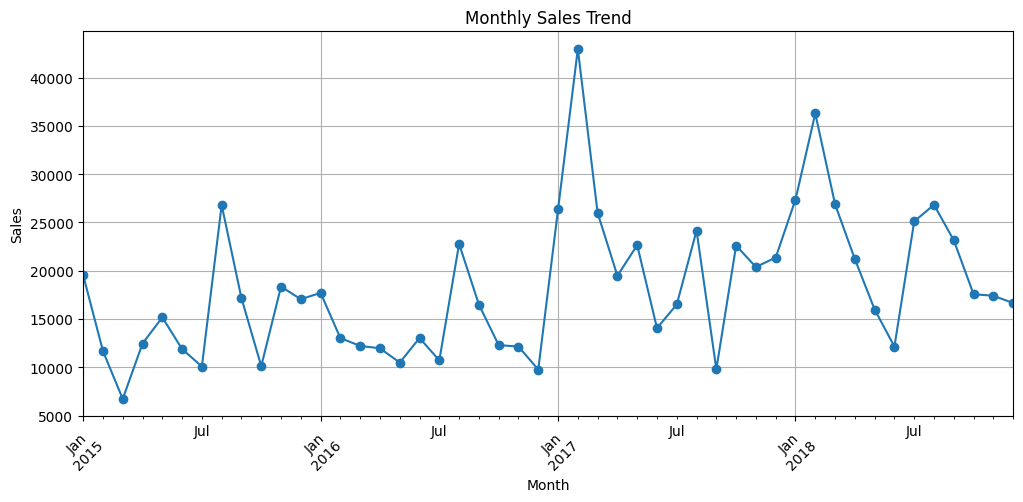

In [12]:
df['Month'] = df['Order_Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales.plot(marker='o', figsize=(12, 5))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-13-241003244.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Category', y='Sales', estimator=sum, palette='pastel')


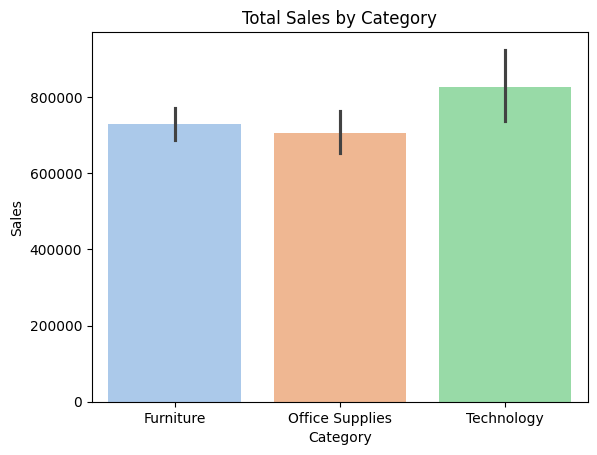

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x='Category', y='Sales', estimator=sum, palette='pastel')
plt.title("Total Sales by Category")
plt.show()


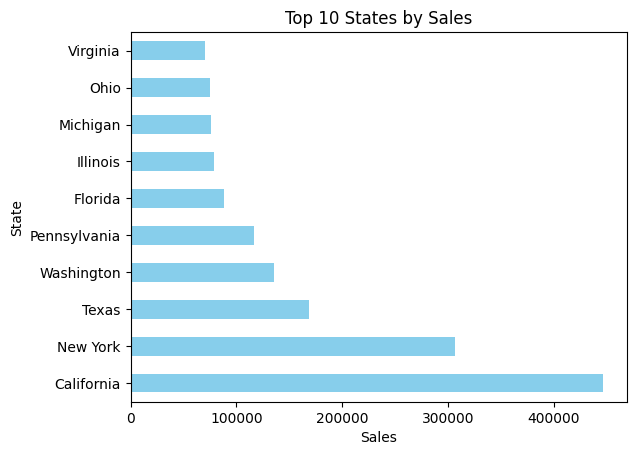

In [14]:
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)

top_states.plot(kind='barh', color='skyblue')
plt.title("Top 10 States by Sales")
plt.xlabel("Sales")
plt.show()


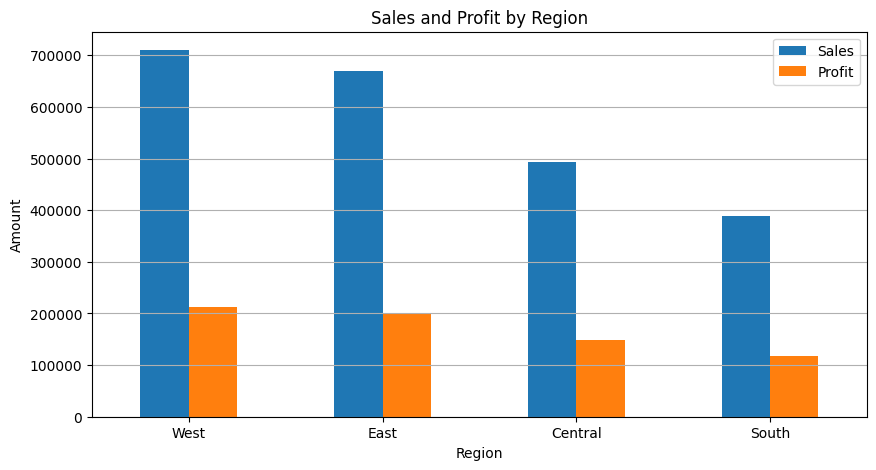

In [15]:
region_summary = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

region_summary.plot(kind='bar', figsize=(10, 5))
plt.title("Sales and Profit by Region")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()
